In [811]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import statsmodels.api as sm
from scipy.special import gamma, loggamma, factorial
import scipy.stats
from scipy.interpolate import interp1d
from matplotlib.ticker import AutoMinorLocator 
from matplotlib import rc, font_manager
from matplotlib.lines import Line2D
from matplotlib import colors as mcolors
from mycolorpy import colorlist as mcp
from matplotlib import legend_handler
from matplotlib_scalebar.scalebar import ScaleBar
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
import collections
import matplotlib
import shapely.geometry
from shapely.geometry import Point
import shapely.ops 
from geopy.geocoders import Nominatim
import geopandas as gpd
import mapclassify
import jenkspy
import contextily as cx
import os
import rioxarray as rx
import pyreadr
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from pysal.lib import weights
from libpysal.io import open as psopen
# import plots
import seaborn as sns
from datetime import datetime, timedelta
import jenkspy

In [812]:
wd = '/Users/carmen/Library/CloudStorage/OneDrive-TheUniversityofLiverpool/Research/RECAST/latin-mobility-covid-local-files'


country = 'Argentina'

if country=='Argentina':
    country_short = 'ARG'
    country_code = 'AR'
elif country == 'Chile':
    country_short = 'CHL'
    country_code = 'CL'
elif country == 'Colombia':
    country_short = 'COL'
    country_code = 'CO'
elif country == 'Mexico':
    country_short = 'MEX'
    country_code = 'MX'

In [813]:
movcell_baseline_input_pop = gpd.read_file(wd + '/data/outputs/' + country_short + '/grids-with-data/movcell-baseline-input-pop-with-exo-var/movcell-baseline-input-pop-with-exo-var.gpkg')
baseline_input_mov = pd.read_csv(wd + '/data/outputs/' + country_short + '/baseline/movcell-baseline-input-mov-with-exo-var-flatten.csv').drop('Unnamed: 0', axis=1)

df_mov_evo = pd.read_csv(wd + '/data/outputs/' + country_short + '/evo/mov_evo.csv').drop('Unnamed: 0', axis=1)
df_pop_evo = pd.read_csv(wd + '/data/outputs/' + country_short + '/evo/pop_evo_movcell.csv').drop('Unnamed: 0', axis=1)




In [897]:
df_mov_evo

,O,D,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,...,2022-05-12,2022-05-13,2022-05-14,2022-05-15,2022-05-16,2022-05-17,2022-05-18,2022-05-19,2022-05-20,2022-05-21
0,5483.0,5482.0,24.806730,NaN,NaN,NaN,NaN,40.844120,28.837484,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10875.0,10875.0,69.000000,70.000000,74.000000,70.000000,69.000000,83.000000,88.000000,86.000000,...,64.000000,64.000000,75.000000,88.000000,68.000000,74.000000,76.000000,65.000000,72.000000,57.000000
2,5480.0,5480.0,55.426994,57.580189,107.556869,113.060796,74.451406,76.662601,141.757978,55.426994,...,66.512393,NaN,92.191602,56.530398,104.231968,65.710801,90.209622,NaN,46.064151,NaN
3,5482.0,5482.0,572.000000,570.000000,574.000000,563.000000,564.000000,562.000000,569.000000,562.000000,...,357.000000,357.000000,367.000000,352.000000,348.000000,331.000000,363.000000,345.000000,343.000000,369.000000
4,5726.0,5645.0,9.157729,24.544748,20.041571,69.464041,41.821524,47.499081,20.760100,32.052053,...,27.473188,12.272374,20.041571,NaN,NaN,33.927915,NaN,22.894324,24.544748,20.041571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33941,5869.0,5869.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,577.057026
33942,6359.0,6507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,151.383993
33943,8342.0,8273.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.434283
33944,7860.0,7791.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.014588


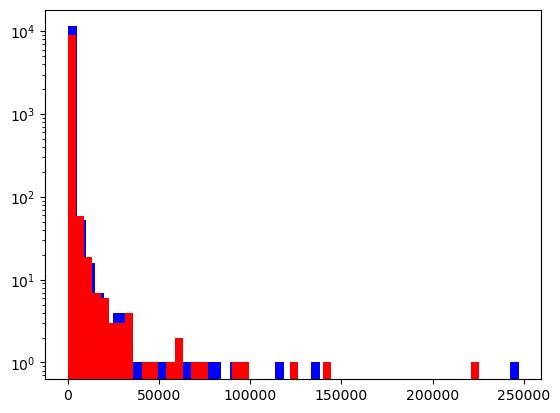

In [900]:
fig, ax = plt.subplots()

ax.hist(movcell_baseline_input_pop['0'], bins=50, color='blue')
ax.hist(df_pop_evo['2020-04-04'], bins=50, color='red')
ax.set_yscale('log')

plt.show()

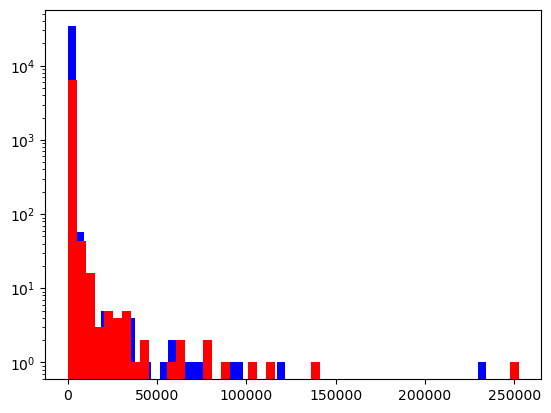

In [901]:
fig, ax = plt.subplots()

ax.hist(baseline_input_mov['0'], bins=50, color='blue')
ax.hist(df_mov_evo['2020-04-04'], bins=50, color='red')
ax.set_yscale('log')

plt.show()

In [817]:
baseline_input_mov

,O,D,0,1,2,3,4,5,6
0,5483.0,5482.0,18.818704,18.303820,18.525997,18.400100,18.332739,17.957064,18.077941
1,10875.0,10875.0,81.000000,81.600000,75.600000,76.800000,73.600000,74.000000,88.800000
2,5480.0,5480.0,63.335969,61.612145,62.357048,61.926968,61.705215,60.464554,60.885322
3,5482.0,5482.0,529.200000,537.200000,531.400000,528.000000,536.000000,529.250000,529.400000
4,5726.0,5645.0,16.461435,16.015783,16.209321,16.097077,16.039381,15.715831,15.824936
...,...,...,...,...,...,...,...,...,...
33941,5869.0,5869.0,63.622419,61.890006,62.636629,62.206045,61.983674,60.736922,61.159934
33942,6359.0,6507.0,10.840281,10.565543,10.670319,10.517484,10.515823,10.854171,11.279006
33943,8342.0,8273.0,0.219430,0.213444,0.215993,0.214505,0.213768,0.209453,0.210899
33944,7860.0,7791.0,1.963924,1.910625,1.933879,1.920464,1.913561,1.874584,1.887337


In [825]:
categories = np.unique(movcell_baseline_input_pop['density_category'])
categories = [cat for cat in categories if pd.isna(cat)==False]
print(categories)

cat_O = []
# cat_D = []
for i in categories:
#     for j in categories:
        cat_O.append(i)
#         cat_D.append(j)

df_fig_den = pd.DataFrame({column: [np.nan for i in range(len(cat_O))] for column in df_mov_evo.columns[2:]})   
df_fig_den.insert(loc=df_fig_den.columns.get_loc(df_fig_den.columns[0]), column='cat_O', value=cat_O)

df_fig_den_bl = pd.DataFrame({column: [np.nan for i in range(len(cat_O))] for column in df_mov_evo.columns[2:]})   
df_fig_den_bl.insert(loc=df_fig_den_bl.columns.get_loc(df_fig_den_bl.columns[0]), column='cat_O', value=cat_O)

df_fig_rdi = pd.DataFrame({column: [np.nan for i in range(len(cat_O))] for column in df_mov_evo.columns[2:]})   
df_fig_rdi.insert(loc=df_fig_rdi.columns.get_loc(df_fig_rdi.columns[0]), column='cat_O', value=cat_O)

df_fig_rdi_bl = pd.DataFrame({column: [np.nan for i in range(len(cat_O))] for column in df_mov_evo.columns[2:]})   
df_fig_rdi_bl.insert(loc=df_fig_rdi_bl.columns.get_loc(df_fig_rdi_bl.columns[0]), column='cat_O', value=cat_O)



[0.0, 1.0, 2.0]


In [826]:
df_fig_rdi_bl

,cat_O,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,...,2022-05-12,2022-05-13,2022-05-14,2022-05-15,2022-05-16,2022-05-17,2022-05-18,2022-05-19,2022-05-20,2022-05-21
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [902]:
def smooth_remove_outliers(df):
    
    q_lower_O = df['sum_O'].quantile(0.05)
    q_upper_O = df['sum_O'].quantile(0.95)
    outliers_O = df[(df['sum_O'] < q_lower_O) | (df['sum_O'] > q_upper_O)]
    df.loc[outliers_O.index, 'sum_O'] = np.nan

    q_lower_OD = df['sum_OD'].quantile(0.05)
    q_upper_OD = df['sum_OD'].quantile(0.95)
    outliers_OD = df[(df['sum_OD'] < q_lower_OD) | (df['sum_OD'] > q_upper_OD)]
    df.loc[outliers_OD.index, 'sum_OD'] = np.nan

    df['sum_O'] = df['sum_O'].interpolate(option='spline')
    df['sum_O_roll_avg'] = df['sum_O'].rolling(1).mean() 

    df['sum_OD'] = df['sum_OD'].interpolate(option='spline')
    df['sum_OD_roll_avg'] = df['sum_OD'].rolling(1).mean() 
    
    return df


In [903]:
def create_quotient_df(df, baseline):

    quotient = []
    for i in range(len(df)):
        if pd.isna(df.loc[i, 'sum_O']) == False:
            quotient.append(df.loc[i, 'sum_OD']/df.loc[i, 'sum_O'])
        else:
            quotient.append(np.nan)

    quotient = pd.DataFrame({'quotient': quotient})   
    quotient['quotient'] = quotient['quotient'].interpolate(option='spline')
    if baseline == True:
        quotient['quotient_roll_avg'] = quotient['quotient'].rolling(1).mean() 
    else:
        quotient['quotient_roll_avg'] = quotient['quotient'].rolling(7).mean() 
    
    return quotient


In [922]:
def find_mov_category(cat, variable, movcell_baseline_input_pop, df_pop_evo, df_mov_evo):
    
    indices_O = np.array(movcell_baseline_input_pop[movcell_baseline_input_pop[variable + '_category'] == cat].index)
    # indices_D = np.array(movcell_baseline_input_pop[movcell_baseline_input_pop['density_category'] == df_fig_den.loc[cat_OD_index, 'cat_D']].index)
    indices_D = np.array(movcell_baseline_input_pop.index)

    df_pop_evo_O = df_pop_evo.copy()
    df_pop_evo_O = df_pop_evo_O.iloc[indices_O]
    df_pop_evo_O = df_pop_evo_O#.drop(['FID'],axis=1)
    
    movcell_baseline_input_pop_O = movcell_baseline_input_pop.copy()
    movcell_baseline_input_pop_O = movcell_baseline_input_pop_O.iloc[indices_O]
    movcell_baseline_input_pop_O = movcell_baseline_input_pop_O#.drop(['FID'],axis=1)    

    df_mov_evo_O = df_mov_evo.copy()
    df_mov_evo_O = df_mov_evo_O[df_mov_evo_O['O'].isin(list(indices_O))]
    df_mov_evo_OD = df_mov_evo_O[df_mov_evo_O['D'].isin(list(indices_D))]
    df_mov_evo_OD = df_mov_evo_OD#.drop(['O', 'D'],axis=1)
    
    baseline_input_mov_O = baseline_input_mov.copy()
    baseline_input_mov_O = baseline_input_mov_O[baseline_input_mov_O['O'].isin(list(indices_O))]
    baseline_input_mov_OD = baseline_input_mov_O[baseline_input_mov_O['D'].isin(list(indices_D))]
    baseline_input_mov_OD = baseline_input_mov_OD#.drop(['O', 'D'],axis=1)      
    
    # print(df_mov_evo_OD)

    dates = np.array([])
    sums_O = np.array([])
    sums_OD = np.array([])
    sums_bl_O = np.array([])
    sums_bl_OD = np.array([])

    for column in df_mov_evo_OD.columns[4:]:

#         try:
        index_date_pop_O_na = np.array(df_pop_evo_O.iloc[np.where(pd.isna(df_pop_evo_O[column]))[0]]['FID'])
        index_date_mov_OD_na = np.array(df_mov_evo_OD.iloc[np.where(pd.isna(df_mov_evo_OD[column]))[0]]['O'])
#         print(len(df_mov_evo_OD), len(index_date_mov_OD_na))
        index_date_pop_mov_O_na = np.array(np.unique(np.append(index_date_pop_O_na, index_date_mov_OD_na)))
    
        col_to_sum_pop_evo_O = df_pop_evo_O[~df_pop_evo_O['FID'].isin(index_date_pop_mov_O_na)][column]
        col_to_sum_mov_evo_OD = df_mov_evo_OD[~df_mov_evo_OD['O'].isin(index_date_pop_mov_O_na)][column] 
        dates = np.append(dates, column)
        sum_O = np.sum(col_to_sum_pop_evo_O)
        if sum_O > 0:
            sums_O = np.append(sums_O, sum_O)
        else: 
            sums_O = np.append(sums_O, np.nan)
        sum_OD = np.sum(col_to_sum_mov_evo_OD)
        if sum_OD > 0:
            sums_OD = np.append(sums_OD, sum_OD)
        else:
            sums_OD = np.append(sums_OD, np.nan)    
    
        wday = datetime.strptime(column, "%Y-%m-%d").weekday()

        index_date_pop_bl_O_na = np.array(movcell_baseline_input_pop_O.iloc[np.where(pd.isna(movcell_baseline_input_pop_O[str(wday)]))[0]].index)
        index_date_mov_bl_OD_na = np.array(baseline_input_mov_OD.iloc[np.where(pd.isna(baseline_input_mov_OD[str(wday)]))[0]]['O'])
        index_date_pop_mov_bl_O_na = np.array(np.unique(np.append(index_date_pop_bl_O_na, index_date_mov_bl_OD_na)))
        
        col_to_sum_pop_evo_bl_O = movcell_baseline_input_pop_O.drop(index_date_pop_bl_O_na)[str(wday)]
        col_to_sum_mov_evo_bl_OD = baseline_input_mov_OD[~baseline_input_mov_OD['O'].isin(index_date_pop_mov_O_na)][str(wday)]
        sum_bl_O = np.sum(col_to_sum_pop_evo_bl_O)
        if sum_bl_O > 0:
            sums_bl_O = np.append(sums_bl_O, sum_bl_O)
        else:
            sums_bl_O = np.append(sums_bl_O, np.nan)
        sum_bl_OD = np.sum(col_to_sum_mov_evo_bl_OD)
        if sum_bl_OD > 0:
            sums_bl_OD = np.append(sums_bl_OD, sum_bl_OD)
        else:
            sums_bl_OD = np.append(sums_bl_OD, np.nan)
                
#         except:
#             print('cant find column for date in one of the dataframes')

    df_pop_mov_evo_sum = pd.DataFrame({'date': dates, 'sum_O': sums_O, 'sum_OD': sums_OD})
    df_pop_mov_evo_sum_outliers = df_pop_mov_evo_sum.copy()
    df_pop_mov_evo_sum_outliers = smooth_remove_outliers(df_pop_mov_evo_sum_outliers)
    
    df_pop_mov_evo_bl_sum = pd.DataFrame({'date': dates, 'sum_O': sums_bl_O, 'sum_OD': sums_bl_OD})
    df_pop_mov_evo_bl_sum_outliers = df_pop_mov_evo_bl_sum.copy()
    df_pop_mov_evo_bl_sum_outliers = smooth_remove_outliers(df_pop_mov_evo_bl_sum_outliers)

    quotient = create_quotient_df(df_pop_mov_evo_sum_outliers, False)
    quotient_bl = create_quotient_df(df_pop_mov_evo_bl_sum_outliers, True)

    return dates[0], quotient['quotient_roll_avg'], quotient_bl['quotient_roll_avg'], df_pop_mov_evo_sum_outliers['sum_OD_roll_avg'], df_pop_mov_evo_bl_sum_outliers['sum_OD_roll_avg']



In [923]:
categories = list(df_fig_den['cat_O'])

for cat in categories:
    
    variable = 'density'
    date_start, quotient_roll_avg, quotient_bl_roll_avg, mov_roll_avg, mov_bl_roll_avg = find_mov_category(cat, variable, movcell_baseline_input_pop, df_pop_evo, df_mov_evo)
    col_start = np.where(df_fig_den.columns == date_start)[0][0]
    index = np.where(df_fig_den['cat_O']==cat)[0][0]
    df_fig_den.loc[index, df_fig_den.columns[col_start:]] = list(mov_roll_avg)
    df_fig_den_bl.loc[index, df_fig_den_bl.columns[col_start:]] = list(mov_bl_roll_avg)
    
    variable = 'rdi_input'
    date_start, quotient_roll_avg, quotient_bl_roll_avg, mov_roll_avg, mov_bl_roll_avg = find_mov_category(cat, variable, movcell_baseline_input_pop, df_pop_evo, df_mov_evo)
    col_start = np.where(df_fig_rdi.columns == date_start)[0][0]
    index = np.where(df_fig_rdi['cat_O']==cat)[0][0]
    df_fig_rdi.loc[index, df_fig_rdi.columns[col_start:]] = list(mov_roll_avg)    
    df_fig_rdi_bl.loc[index, df_fig_rdi_bl.columns[col_start:]] = list(mov_bl_roll_avg)
    

In [924]:
df_fig_den

,cat_O,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,...,2022-05-12,2022-05-13,2022-05-14,2022-05-15,2022-05-16,2022-05-17,2022-05-18,2022-05-19,2022-05-20,2022-05-21
0,0.0,NaN,NaN,NaN,5215.886937,5334.045279,5452.203622,5403.423469,5155.850822,6052.232372,...,9935.335873,10074.560978,8404.893090,9306.816364,10208.739637,10714.936888,8092.343792,8464.147070,8835.950349,9207.753627
1,1.0,NaN,NaN,24292.695001,25064.981675,22996.271487,25660.351933,25368.403386,24954.770758,26169.328847,...,25316.826715,26206.464936,21324.409032,21203.506222,21082.603412,20961.700602,20956.086475,19231.867198,26393.607295,26393.607295
2,2.0,NaN,NaN,2215.683681,5110.855854,3895.916487,5239.112624,4058.023276,5173.980061,5339.903931,...,6737.167969,4910.830380,4922.537298,1881.608497,4698.095313,5347.021504,4532.508403,5653.397057,5136.763591,3752.984176


In [925]:
df_fig_den_bl 

,cat_O,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,...,2022-05-12,2022-05-13,2022-05-14,2022-05-15,2022-05-16,2022-05-17,2022-05-18,2022-05-19,2022-05-20,2022-05-21
0,0.0,NaN,NaN,971.341182,878.786774,875.641017,980.031048,1084.895305,1010.285321,1066.048723,...,1402.074873,1146.452152,950.218319,1389.239649,1157.056076,1127.252853,1137.415745,1222.879382,1210.451441,1198.023500
1,1.0,NaN,NaN,8318.484930,8849.394362,8952.007732,9486.709245,10021.410759,9724.752067,9753.425362,...,8210.742095,8476.578241,6818.475262,6998.377754,7178.280246,7358.182738,6964.532783,7522.832093,8093.637343,6648.990089
2,2.0,NaN,NaN,1655.790905,4211.424711,2488.889272,5224.134887,1570.314313,2506.588632,2766.793585,...,5107.473408,5005.682368,4157.323672,3308.964976,5585.377455,4580.299447,4069.084972,5665.615474,5125.686348,5350.109007


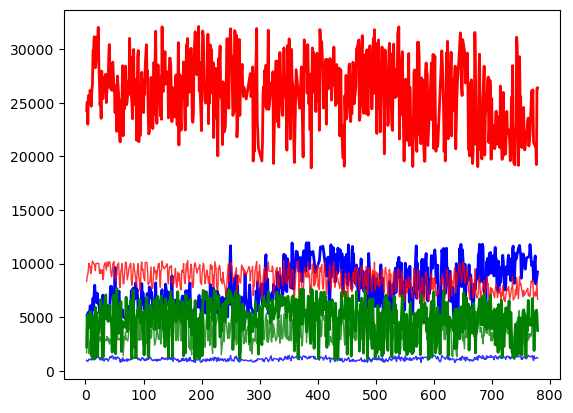

In [926]:
fig, ax = plt.subplots()

colors = ['blue', 'red', 'green']
for j in range(len(categories)):
    y = df_fig_den.loc[j, df_fig_den.columns[1:]] 
    y_bl = df_fig_den_bl.loc[j, df_fig_den_bl.columns[1:]] 
    ax.plot(np.arange(len(df_fig_den.columns[1:])), y, color=colors[j], lw=2)
    ax.plot(np.arange(len(df_fig_den_bl.columns[1:])), y_bl, color=colors[j], lw=1, alpha=0.8)

# ax.set_ylim([0.25, 0.4])


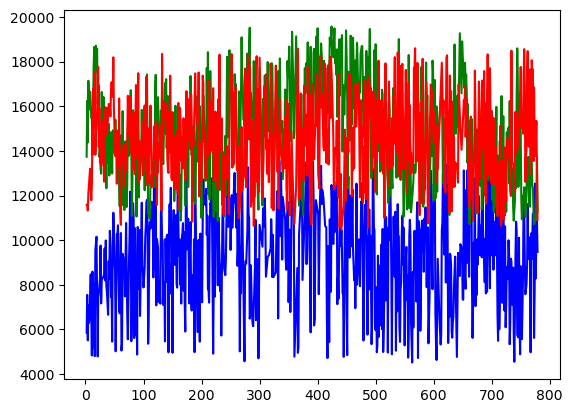

In [927]:
fig, ax = plt.subplots()

ax.plot(np.arange(len(df_fig_rdi.columns[1:])), df_fig_rdi.loc[0, df_fig_rdi.columns[1:]], color='blue')
ax.plot(np.arange(len(df_fig_rdi.columns[1:])), df_fig_rdi.loc[1, df_fig_rdi.columns[1:]], color='green')
ax.plot(np.arange(len(df_fig_rdi.columns[1:])), df_fig_rdi.loc[2, df_fig_rdi.columns[1:]], color='red')

In [ ]:
# WITH RESPECT TO BASELINE!!!!

In [626]:
df_pop_mov_evo_sum_outliers = df_pop_mov_evo_sum.copy()

q_lower_O = df_pop_mov_evo_sum_outliers['sum_O'].quantile(0.05)
q_upper_O = df_pop_mov_evo_sum_outliers['sum_O'].quantile(0.95)
outliers_O = df_pop_mov_evo_sum_outliers[(df_pop_mov_evo_sum_outliers['sum_O'] < q_lower_O) | (df_pop_mov_evo_sum_outliers['sum_O'] > q_upper_O)]
df_pop_mov_evo_sum_outliers.loc[outliers_O.index, 'sum_O'] = np.nan

q_lower_OD = df_pop_mov_evo_sum_outliers['sum_OD'].quantile(0.05)
q_upper_OD = df_pop_mov_evo_sum_outliers['sum_OD'].quantile(0.95)
outliers_OD = df_pop_mov_evo_sum_outliers[(df_pop_mov_evo_sum_outliers['sum_OD'] < q_lower_OD) | (df_pop_mov_evo_sum_outliers['sum_OD'] > q_upper_OD)]
df_pop_mov_evo_sum_outliers.loc[outliers_OD.index, 'sum_OD'] = np.nan


In [644]:
df_pop_mov_evo_sum_outliers['sum_O'] = df_pop_mov_evo_sum_outliers['sum_O'].interpolate(option='spline')
df_pop_mov_evo_sum_outliers['sum_O_roll_avg' ] = df_pop_mov_evo_sum_outliers['sum_O'].rolling(4).mean() 

df_pop_mov_evo_sum_outliers['sum_OD'] = df_pop_mov_evo_sum_outliers['sum_OD'].interpolate(option='spline')
df_pop_mov_evo_sum_outliers['sum_OD_roll_avg' ] = df_pop_mov_evo_sum_outliers['sum_OD'].rolling(4).mean() 

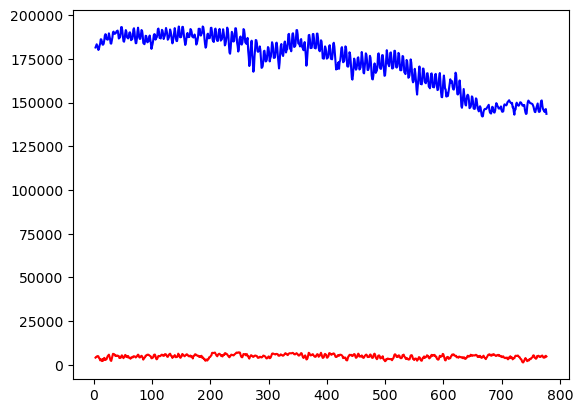

In [645]:
fig, ax = plt.subplots()

ax.plot(np.arange(len(df_pop_mov_evo_sum_outliers)), df_pop_mov_evo_sum_outliers['sum_O_roll_avg'], color='blue')
ax.plot(np.arange(len(df_pop_mov_evo_sum_outliers)), df_pop_mov_evo_sum_outliers['sum_OD_roll_avg'], color = 'red')

# ax.set_xlim([0,530])
# ax.set_ylim([0,13000])

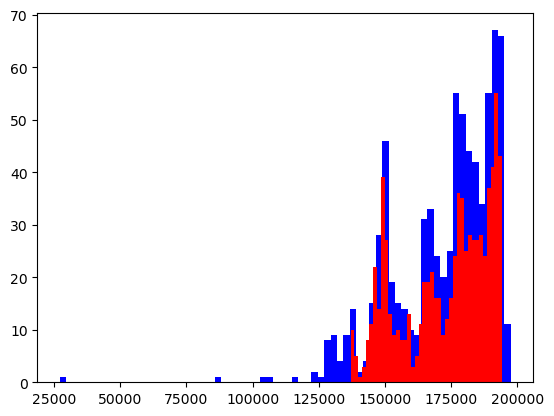

In [646]:
fig, ax = plt.subplots()

ax.hist(df_pop_mov_evo_sum['sum_O'], bins=70, color='blue')
ax.hist(df_pop_mov_evo_sum_outliers['sum_O'], bins=40, color='red')

plt.show()

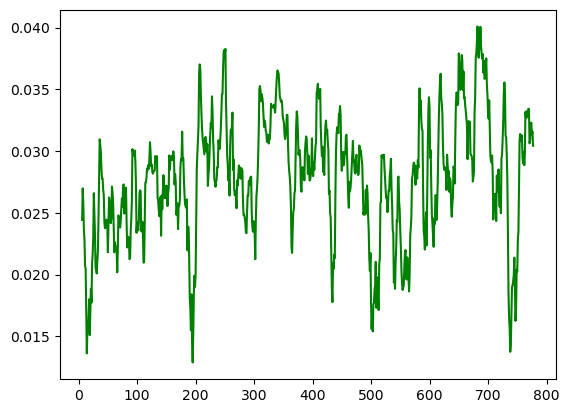

In [668]:
fig, ax = plt.subplots()

quotient =[]
for i in range(len(df_pop_mov_evo_sum_outliers)):
    if pd.isna(df_pop_mov_evo_sum_outliers.loc[i, 'sum_O']) == False:
        quotient.append(df_pop_mov_evo_sum_outliers.loc[i, 'sum_OD']/df_pop_mov_evo_sum_outliers.loc[i, 'sum_O'])
    else:
        quotient.append(np.nan)

quotient = pd.DataFrame({'quotient': quotient})   
quotient['quotient'] = quotient['quotient'].interpolate(option='spline')
quotient['quotient_roll_avg' ] = quotient['quotient'].rolling(7).mean() 
ax.plot(np.arange(len(quotient)), quotient['quotient_roll_avg'], color='green')

# ax.set_ylim([0,0.1])

plt.show()

In [655]:
quotient

,quotient
0,0.012387
1,0.028630
2,0.021319
3,0.028194
4,0.022237
...,...
773,0.036042
774,0.033081
775,0.037649
776,0.034361
